In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [95]:
Dataset = pd.read_csv("car_purchasing.csv",encoding="ISO-8859-1")

In [96]:
Dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [97]:
corr = Dataset.corr()

<ipython-input-97-eebafd106394>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Dataset.corr()


<Axes: >

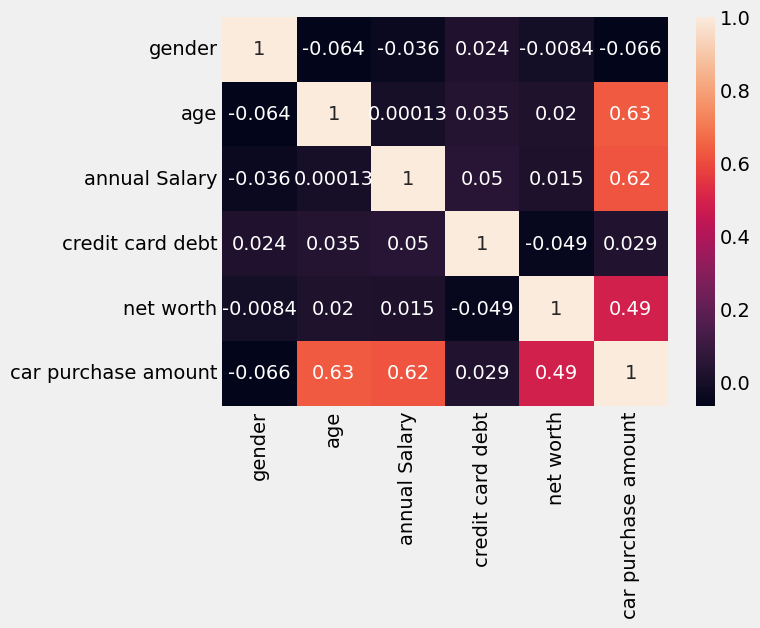

In [98]:
sns.heatmap(data = corr,annot=True)

In [99]:
Dataset.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [100]:
for x in Dataset.columns:
    if Dataset[x].dtype == 'O':  # Check Dataset type for objects (strings)
        print(x,Dataset[x].nunique())  # Print the count of unique values


customer name 498
customer e-mail 500
country 211


In [101]:
data=Dataset.drop(columns = ['customer name','customer e-mail','country'],axis=1)

In [102]:
data

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [103]:
  X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [104]:
print(X)

     gender        age  annual Salary  credit card debt    net worth
0         0  41.851720    62812.09301      11609.380910  238961.2505
1         0  40.870623    66646.89292       9572.957136  530973.9078
2         1  43.152897    53798.55112      11160.355060  638467.1773
3         1  58.271369    79370.03798      14426.164850  548599.0524
4         1  57.313749    59729.15130       5358.712177  560304.0671
..      ...        ...            ...               ...          ...
495       0  41.462515    71942.40291       6995.902524  541670.1016
496       1  37.642000    56039.49793      12301.456790  360419.0988
497       1  53.943497    68888.77805      10611.606860  764531.3203
498       1  59.160509    49811.99062      14013.034510  337826.6382
499       1  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns]


In [105]:
print(y)

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64


In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [108]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [109]:
lreg.fit(X_train,y_train)

LinearRegression()

In [110]:
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999800931889
Test score 0.9999999847086706


In [115]:
ann = Sequential([Dense(25, activation="relu"),
                 Dense(10, activation='relu'),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 15ms/step - loss: 0.3088 - mean_absolute_error: 0.5343 - val_loss: 0.1844 - val_mean_absolute_error: 0.4168
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1961 - mean_absolute_error: 0.4199 - val_loss: 0.0932 - val_mean_absolute_error: 0.2906
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0984 - mean_absolute_error: 0.2855 - val_loss: 0.0322 - val_mean_absolute_error: 0.1553
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0375 - mean_absolute_error: 0.1598 - val_loss: 0.0109 - val_mean_absolute_error: 0.0846
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0986 - val_loss: 0.0138 - val_mean_absolute_error: 0.0973
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0099 - val_mean_absolute_error: 0.0806
Epoch 7/50
10/10 [=========

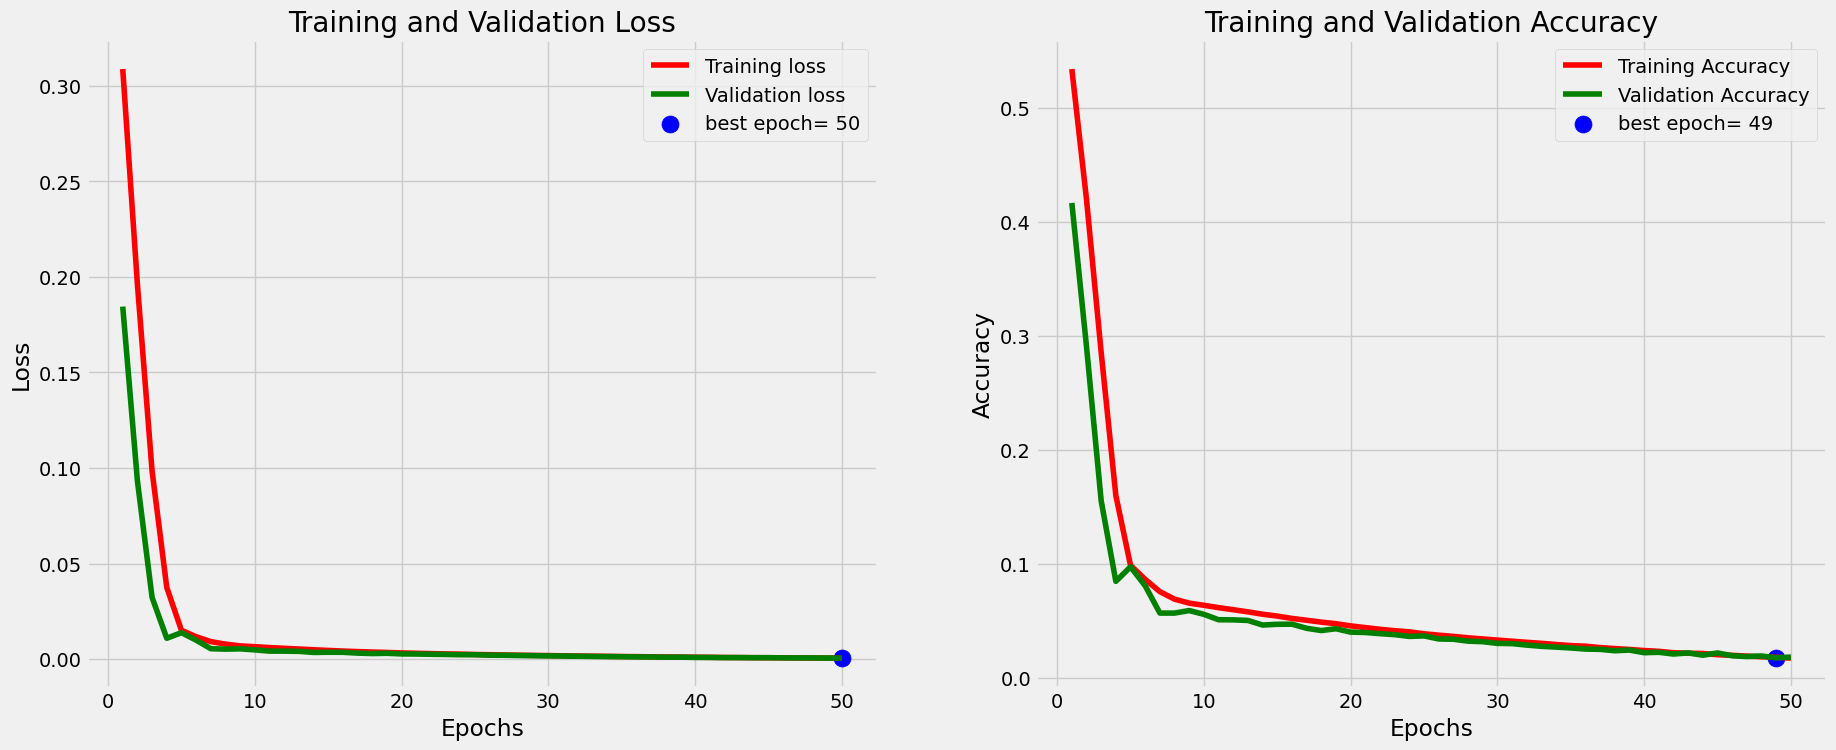

In [116]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [117]:
y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [118]:
from sklearn.metrics import r2_score

In [119]:
y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [120]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9716510554499374
